# Ecommerce Exploration Analysis
#### by Emil Supriatna

## **Contents**

1. Business Problem
1. Data Understanding
1. Data Analysis

## A. Business Problem

Dalam persaingan bisnis, mempertahankan pemasukan perusahaan bisa dilakukan melalui cara memperbesar skala bisnis atau menjaga pelanggan agar terus memakai jasa/layanan perusahaan tersebut. Pelanggan yang berhenti menggunakan layanan/jasa perusahaan dapat dikatakan sebagai Customer Churn. [(Forbes)](https://www.forbes.com/advisor/business/churn-rate/).

Kasus kehilangan pelanggan (*Customers Churn*) karena beralih ke pesaing atau memutuskan untuk tidak lagi menggunakan layanan e-commerce akan sangat merugikan, terutama dari sisi pemasukan dan operasional perusahaan. Sebab, mendatangkan pelanggan baru membutuhkan biaya marketing yang tidak sedikit. Secara rata-rata, perusahaan hanya perlu mengeluarkan biaya 4 - 5 kali lebih tinggi untuk mendatangkan pelanggan baru dibandingkan biaya mempertahankan pelanggan lama. Selain itu, terdapat keuntungan lain apabila perusahaan berhasil mempertahankan pelanggan lama, seperti misalnya menjual produk/jasa ke pelanggan lama memiliki rata-rata keberhasilan yang lebih tinggi sebesar 60 - 70% dibandingkan ke pelanggan baru. Puncaknya adalah apabila perusahaan mampu meningkatkan customer retention sebesar 5%, dampaknya yang dihasilkan adalah potensi peningkatan pemasukan hingga 25% [(Outbound)](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/#:~:text=Acquiring%20a%20new%20customer%20can,customer%20is%205%2D20%25.)


Melihat pentingnya kemampuan menjaga agar pelanggan tidak berpindah ke layanan lain, perusahaan perlu melakukan usaha sebaik mungkin agar membuat pelanggan tetap bertransaksi di layanannya, salah satunya melalui pemberian promo pelanggan. Hanya saja, usaha ini perlu dilakukan secara tepat sasaran agar manfaat yang didapatkan optimal. Oleh karena itu, penting bagi perusahaan untuk dapat mengetahui pelanggan manakah yang memiliki potensi menjadi Churn dan perlu diberikan promo.

Pada kasus ini, sebuah perusahaan e-commerce meminta tim Data Analyst untuk membuat analisis exploratif untuk memahami alasan pelanggan churn dengan cara menganalisis faktor-faktor penyebab *Churn* berdasarkan histori pelanggan-pelanggan sebelumnya. Analisis yang dihasilkan diharapkan dapat meningkatkan efektifitas promo yang akan diberikan untuk mengurangi tingkat churn.

## B. Data Understanding 

Setelah menyatakan *problem statement*, hal selanjutnya yang dapat dilakukan adalah memahami data yang telah didapatkan sebagai upaya memahami bisnis dan permasalahannya dengan lebih mendalam. Pemahaman data dapat dimulai dengan memahami atribut kolom beserta penjelasannya, kemudian mengimpor terlebih dahulu *library* yang dibutuhkan, dan terakhir menampilkan datasetnya dengan metode *pd.read_excel()*.

In [1]:
# Library Import

# Data Analysis Tools
import pandas as pd
import numpy as np
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import logging
logging.getLogger('lightgbm').setLevel(logging.WARNING)

# Set options to display all rows and columns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
# Load Dataset
df = pd.read_excel('data_final.xlsx')
df

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,CashbackAmount,Churn,bin
0,9,Computer,Tier_1,9,Credit Card,Male,5_Devices,Mobile Phone,1-Very_Satisfied,Single,2,Complain,2,5,174.30,0,"(162.495, 243.742]"
1,3,Mobile Phone,Tier_1,35,Credit Card,Female,5_Devices,Mobile Phone,5-Highly_Dissatisfied,Single,3,non-Complain,2,5,162.85,0,"(162.495, 243.742]"
2,25,Mobile Phone,Tier_1,6,Debit Card,Male,4_Devices,Others,3-Neutral,Divorced,1,non-Complain,11,9,299.99,0,"(243.742, 324.99]"
3,8,Computer,Tier_2,18,Debit Card,Male,5_Devices,Laptop & Acc,4-Dissatisfied,Divorced,6,non-Complain,2,9,169.90,0,"(162.495, 243.742]"
4,31,Computer,Tier_3,35,E wallet,Female,5_Devices,Fashion,5-Highly_Dissatisfied,Divorced,6,non-Complain,14,3,227.66,0,"(162.495, 243.742]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,27,Mobile Phone,Tier_1,30,Debit Card,Female,4_Devices,Grocery,2-Satisfied,Single,8,non-Complain,4,9,267.75,0,"(243.742, 324.99]"
4489,27,Mobile Phone,Tier_3,9,E wallet,Female,3_Devices,Laptop & Acc,5-Highly_Dissatisfied,Divorced,3,non-Complain,1,5,159.40,0,"(81.248, 162.495]"
4490,4,Mobile Phone,Tier_3,19,COD,Female,4_Devices,Laptop & Acc,3-Neutral,Single,2,non-Complain,5,5,190.77,0,"(162.495, 243.742]"
4491,0,Mobile Phone,Tier_1,25,Credit Card,Male,3_Devices,Mobile Phone,2-Satisfied,Divorced,4,non-Complain,1,2,136.69,0,"(81.248, 162.495]"


**Dataset understanding**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4493 entries, 0 to 4492
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    4493 non-null   int64  
 1   PreferredLoginDevice      4493 non-null   object 
 2   CityTier                  4493 non-null   object 
 3   WarehouseToHome           4493 non-null   int64  
 4   PreferredPaymentMode      4493 non-null   object 
 5   Gender                    4493 non-null   object 
 6   NumberOfDeviceRegistered  4493 non-null   object 
 7   PreferedOrderCat          4493 non-null   object 
 8   SatisfactionScore         4493 non-null   object 
 9   MaritalStatus             4493 non-null   object 
 10  NumberOfAddress           4493 non-null   int64  
 11  Complain                  4493 non-null   object 
 12  OrderCount                4493 non-null   int64  
 13  DaySinceLastOrder         4493 non-null   int64  
 14  Cashback

In [4]:
display(df.describe().T, df.describe(include='O').T)

,count,mean,std,min,25%,50%,75%,max
Tenure,4493.0,10.158024,8.293935,0.0,3.00,9.00,15.00,31.00
WarehouseToHome,4493.0,15.500111,8.017085,5.0,9.00,14.00,19.00,36.00
NumberOfAddress,4493.0,4.187403,2.543487,1.0,2.00,3.00,6.00,11.00
OrderCount,4493.0,2.967950,2.873846,1.0,1.00,2.00,3.00,16.00
DaySinceLastOrder,4493.0,4.435344,3.482320,0.0,2.00,3.00,7.00,18.00
CashbackAmount,4493.0,177.477741,49.396588,0.0,145.83,163.67,196.99,324.99
Churn,4493.0,0.168262,0.374140,0.0,0.00,0.00,0.00,1.00


,count,unique,top,freq
PreferredLoginDevice,4493,2,Mobile Phone,3184
CityTier,4493,3,Tier_1,2910
PreferredPaymentMode,4493,5,Debit Card,1842
Gender,4493,2,Male,2714
NumberOfDeviceRegistered,4493,6,4_Devices,1905
PreferedOrderCat,4493,5,Mobile Phone,1650
SatisfactionScore,4493,5,3-Neutral,1371
MaritalStatus,4493,3,Married,2382
Complain,4493,2,non-Complain,3196
bin,4493,4,"(81.248, 162.495]",2198


**Overviews:**
1. Terdapat 16 kolom dan 4493 baris data, dan data terbagi atas data numerik dan kategorik.
2. Dataset ini sebenarnya sudah di-cleaning pada projek lain. Tujuan penggunaan dataset ini adalah eksplorasi data melalui teknik analisis deskriptif.

## C.Data Analysis

***Proporsi kelompok pelanggan Churn VS Non-Churn***

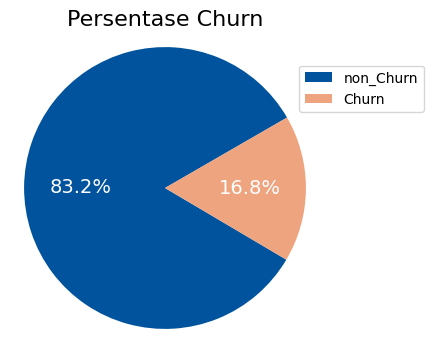

In [5]:
percentage_churn = df['Churn'].value_counts(normalize=True)
labels = ['non_Churn', 'Churn']

plt.figure(figsize=(4, 4))
plt.pie(percentage_churn, autopct='%1.1f%%', startangle=30, colors=['#00539CFF', '#EEA47FFF'], textprops={'fontsize': 14, 'color': 'white'})
plt.title('Persentase Churn', fontsize=16)
plt.axis('equal')
plt.legend(labels,  bbox_to_anchor=(0.91,0.92))
plt.show()

Dapat disimpulkan bahwa dataset ini mengalami ketidakseimbangan (imbalance). Ini terlihat dari perbandingan jumlah observasi antara kelas churn dan kelas non-churn dengan proporsi non-churn 83.2% dan churn 16.8%

Tahapan ini merupakan bagian dari exploratory data analysis (EDA) tahap lanjut dan menekankan pada hubungan antar variabel independen dengan variabel dependennya. Tujuan dari analisis data adalah untuk mengekstrak informasi yang berguna dari sebuah data dan mengambil keputusan dengan berdasarkan analisis data. 



**Splitting Data: Churn & non_Churn**

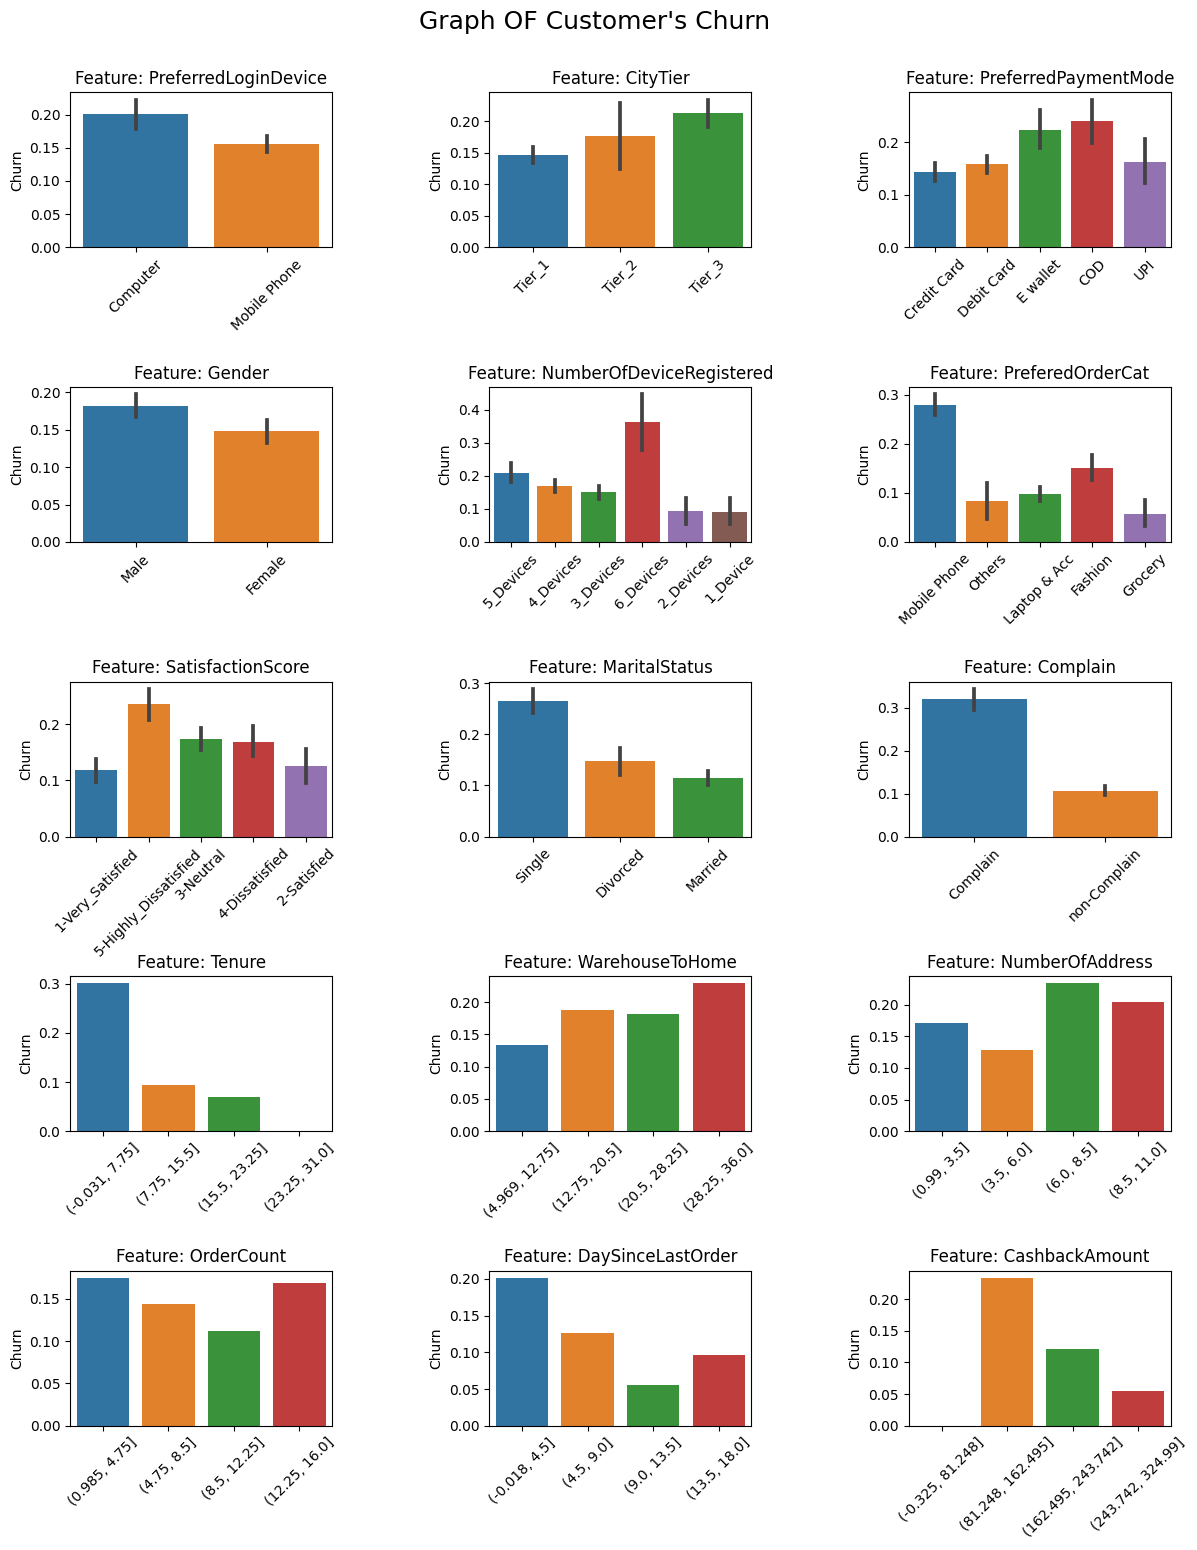

In [6]:
category = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'NumberOfDeviceRegistered',
            'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']
numeric = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderCount',
           'DaySinceLastOrder', 'CashbackAmount']
columns = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'NumberOfDeviceRegistered',
            'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain', 'Tenure', 'WarehouseToHome',
           'NumberOfAddress', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

plt.figure(figsize=(12, 15))

for i, col in enumerate(columns, start=1):
    plt.subplot(5, 3, i)
    if col in numeric:
        df['bin'] = pd.cut(df[col], 4)   
        df1 = df.groupby(['bin'])['Churn'].mean().reset_index()

        sns.barplot(x='bin', y='Churn', data=df1)
        plt.title(f'Feature: {col}')
        plt.xlabel('')
        plt.xticks(rotation=45)
        plt.tight_layout()
        
    elif col in category:
        df1 = df.groupby([col])['Churn'].mean().reset_index() 
        sns.barplot(x=col, y='Churn', data=df)
        plt.xticks(rotation=45)
        plt.xlabel('')
        plt.title(f'Feature: {col}')  

plt.suptitle("Graph OF Customer's Churn", x=0.5, y=1.03, fontsize=18)
plt.subplots_adjust(wspace=0.6, hspace=0.9)
plt.show()

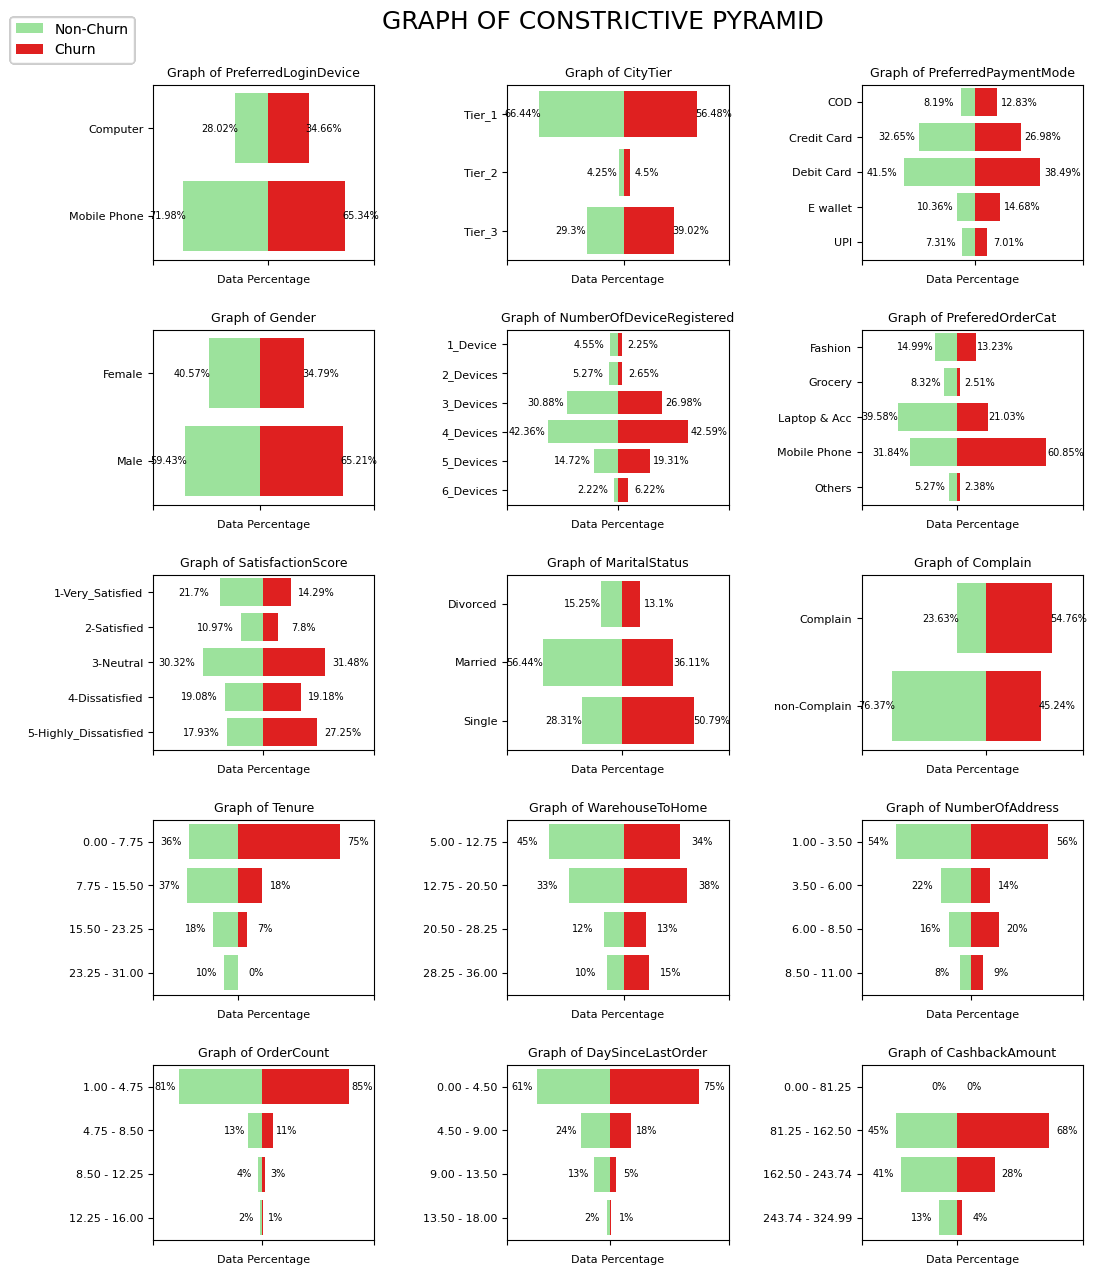

In [7]:
plt.figure(figsize=(12, 15))

category = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'NumberOfDeviceRegistered',
            'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']
numeric = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderCount',
           'DaySinceLastOrder', 'CashbackAmount']
columns = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'NumberOfDeviceRegistered',
            'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain','Tenure', 'WarehouseToHome',
           'NumberOfAddress', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

for i, col in enumerate(columns, start=1):
    plt.subplot(5, 3, i)
    if col in category:
        data_category = df.groupby([col, 'Churn']).size().reset_index(name='Count')
        pivot = pd.pivot_table(data_category, values='Count', index=col, columns='Churn', aggfunc='sum').reset_index()
        pivot = pivot.rename(columns={col: 'label_data'})
        pivot['0(%)'] = round(pivot[0] / pivot[0].sum() * -100, 2)
        pivot['1(%)'] = round(pivot[1] / pivot[1].sum() * 100, 2)
    
        sns.barplot(x='0(%)', y='label_data', data=pivot, color="lightgreen", label='Non-Churn')
        sns.barplot(x='1(%)', y='label_data', data=pivot, color="red", label='Churn')

        plt.title(f'Graph of {col}', fontsize=9)
        plt.tick_params(axis='y', labelsize=8)
        plt.ylabel('', fontsize=4)
        plt.xlabel('Data Percentage', fontsize=8)
        plt.legend(loc='upper left', bbox_to_anchor=(0, 0.93), bbox_transform=plt.gcf().transFigure)

        for index, row in pivot.iterrows():
            plt.text(row['0(%)'] - 13, index, f'{row["0(%)"]*-1}%', color='black', ha="center", va='center', fontsize=7)
            plt.text(row['1(%)'] + 13, index, f'{row["1(%)"]}%', color='black', ha="center", va='center', fontsize=7)

        plt.xticks(ticks=[pivot['0(%)'].min()-25, 0, pivot['1(%)'].max()+25], labels=[])
        plt.grid(False)

    elif col in numeric:
        feature = df[col]
        churn = df['Churn']

        interval_length = (max(feature) - min(feature)) / 4
        intervals = [(min(feature) + i * interval_length, min(feature) + (i + 1) * interval_length) for i in range(4)]

        freq_0, freq_1 = [0] * 4, [0] * 4

        for item, c in zip(feature, churn):
            for i, (lower, upper) in enumerate(intervals):
                if lower <= item < upper:
                    freq_0[i] += 1 if c == 0 else 0
                    freq_1[i] += 1 if c == 1 else 0
                    break

        interval_result = pd.DataFrame({'label_data': [f"{lower:.2f} - {upper:.2f}" for lower, upper in intervals],
                                       0: freq_0, 1: freq_1})
        interval_result['0(%)'] = round(interval_result[0] / interval_result[0].sum() * -100, 0).astype(int)
        interval_result['1(%)'] = round(interval_result[1] / interval_result[1].sum() * 100, 0).astype(int)

        sns.barplot(x='0(%)', y='label_data', data=interval_result, color="lightgreen", label='Non-Churn')
        sns.barplot(x='1(%)', y='label_data', data=interval_result, color="red", label='Churn')

        plt.title(f'Graph of {col}', fontsize=9)
        plt.tick_params(axis='y', labelsize=8)
        plt.ylabel('', fontsize=4)
        plt.xlabel('Data Percentage', fontsize=8)
        plt.legend(loc='upper left', bbox_to_anchor=(0, 0.93), bbox_transform=plt.gcf().transFigure)

        for index, row in interval_result.iterrows():
            plt.text(row['0(%)'] - 13, index, f'{row["0(%)"]*-1}%', color='black', ha="center", va='center', fontsize=7)
            plt.text(row['1(%)'] + 13, index, f'{row["1(%)"]}%', color='black', ha="center", va='center', fontsize=7)

        plt.xticks(ticks=[interval_result['0(%)'].min()-25, 0, interval_result['1(%)'].max()+25], labels=[])
        plt.grid(False)

plt.suptitle('GRAPH OF CONSTRICTIVE PYRAMID', x=0.5, y=0.93, fontsize=18)
plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.show()


**Overviews:**
1. Berikut adalah features yang memengaruhi keputusan pelanggan untuk Churn, yang membedakannya dengan pelanggan non-Churn berdasarkan analisis yang dilakukan terhadap grafik di atas.

In [8]:
selected_features = ['PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain',
                    'Tenure', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']

# filter only customer Churn
customerChurn_Char = df[selected_features]
customerChurn_Char = customerChurn_Char[customerChurn_Char['Churn']==1].reset_index().drop('index', axis=1)
customerChurn_Char

,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,Tenure,DaySinceLastOrder,CashbackAmount,Churn
0,Mobile Phone,3-Neutral,Married,Complain,6,0,124.37,1
1,Mobile Phone,4-Dissatisfied,Single,Complain,5,3,156.40,1
2,Mobile Phone,3-Neutral,Single,Complain,1,8,148.94,1
3,Mobile Phone,5-Highly_Dissatisfied,Single,Complain,0,7,133.48,1
4,Laptop & Acc,3-Neutral,Divorced,Complain,1,3,166.71,1
...,...,...,...,...,...,...,...,...
751,Fashion,4-Dissatisfied,Married,non-Complain,10,8,198.14,1
752,Mobile Phone,1-Very_Satisfied,Married,Complain,1,3,172.87,1
753,Laptop & Acc,3-Neutral,Married,Complain,1,3,170.59,1
754,Fashion,5-Highly_Dissatisfied,Married,Complain,21,3,225.08,1


**Data Visualization**

In [9]:
def viz_01():
    plt.figure(figsize=(12, 8))

    category = ['PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']
    numeric = ['Tenure', 'DaySinceLastOrder', 'CashbackAmount']
    all_feature = ['PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain',
                   'Tenure', 'DaySinceLastOrder', 'CashbackAmount']

    for i, col in enumerate(all_feature, start=1):
        plt.subplot(3, 3, i)
        if col in category:
            data_category = df.groupby([col, 'Churn']).size().reset_index(name='Count')
            pivot = pd.pivot_table(data_category, values='Count', index=col, columns='Churn', aggfunc='sum').reset_index()
            pivot = pivot.rename(columns={col: 'label_data'})
            pivot['0(%)'] = round(pivot[0] / pivot[0].sum() * -100, 2)
            pivot['1(%)'] = round(pivot[1] / pivot[1].sum() * 100, 2)

            sns.barplot(x='0(%)', y='label_data', data=pivot, color="grey", label='Non-Churn')
            sns.barplot(x='1(%)', y='label_data', data=pivot, color="red", label='Churn')

            plt.title(f'Graph of {col}', fontsize=9)
            plt.tick_params(axis='y', labelsize=8)
            plt.ylabel('', fontsize=4)
            plt.xlabel('Data Percentage', fontsize=8)
            plt.legend(loc='upper left', bbox_to_anchor=(0, 0.96), bbox_transform=plt.gcf().transFigure)

            for index, row in pivot.iterrows():
                plt.text(row['0(%)'] - 13, index, f'{row["0(%)"]*-1}%', color='black', ha="center", va='center', fontsize=7)
                plt.text(row['1(%)'] + 13, index, f'{row["1(%)"]}%', color='black', ha="center", va='center', fontsize=7)

            plt.xticks(ticks=[pivot['0(%)'].min()-25, 0, pivot['1(%)'].max()+25], labels=[])
            plt.grid(False)

        elif col in numeric:
            feature = df[col]
            churn = df['Churn']

            interval_length = (max(feature) - min(feature)) / 4
            intervals = [(min(feature) + i * interval_length, min(feature) + (i + 1) * interval_length) for i in range(4)]

            freq_0, freq_1 = [0] * 4, [0] * 4

            for item, c in zip(feature, churn):
                for i, (lower, upper) in enumerate(intervals):
                    if lower <= item < upper:
                        freq_0[i] += 1 if c == 0 else 0
                        freq_1[i] += 1 if c == 1 else 0
                        break

            interval_result = pd.DataFrame({'label_data': [f"{lower:.2f} - {upper:.2f}" for lower, upper in intervals],
                                           0: freq_0, 1: freq_1})
            interval_result['0(%)'] = round(interval_result[0] / interval_result[0].sum() * -100, 0).astype(int)
            interval_result['1(%)'] = round(interval_result[1] / interval_result[1].sum() * 100, 0).astype(int)

            sns.barplot(x='0(%)', y='label_data', data=interval_result, color="lightgreen", label='Non-Churn')
            sns.barplot(x='1(%)', y='label_data', data=interval_result, color="red", label='Churn')

            plt.title(f'Graph of {col}', fontsize=9)
            plt.tick_params(axis='y', labelsize=8)
            plt.ylabel('', fontsize=4)
            plt.xlabel('Data Percentage', fontsize=8)
            plt.legend(loc='upper left', bbox_to_anchor=(0, 0.96), bbox_transform=plt.gcf().transFigure)

            for index, row in interval_result.iterrows():
                plt.text(row['0(%)'] - 13, index, f'{row["0(%)"]*-1}%', color='black', ha="center", va='center', fontsize=7)
                plt.text(row['1(%)'] + 13, index, f'{row["1(%)"]}%', color='black', ha="center", va='center', fontsize=7)

            plt.xticks(ticks=[interval_result['0(%)'].min()-25, 0, interval_result['1(%)'].max()+25], labels=[])
            plt.grid(False)

    plt.suptitle('GRAPH OF CONSTRICTIVE PYRAMID', x=0.5, y=0.96, fontsize=16)
    plt.subplots_adjust(wspace=0.6, hspace=0.4)
    plt.show()


In [10]:
def viz_02():
    grid = plt.GridSpec(2, 2, wspace=0.5, hspace=1)
    plt.figure(figsize=(12, 8))

    # Subplot 1
    plt.subplot(grid[0, 0])
    data_category_0 = df[df['Churn']==0].groupby(['PreferedOrderCat', 'SatisfactionScore'])[['CityTier']].count()
    pivot_0 = pd.pivot_table(data_category_0, values='CityTier', index='SatisfactionScore', columns='PreferedOrderCat', aggfunc='mean')
    sns.heatmap(pivot_0.T, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Value'})
    plt.xticks(rotation=45)
    plt.title("Non-Churn Customers")

    # Subplot 2
    plt.subplot(grid[0, 1])
    data_category_1 = df[df['Churn']==1].groupby(['PreferedOrderCat', 'SatisfactionScore'])[['CityTier']].count()
    pivot_1 = pd.pivot_table(data_category_1, values='CityTier', index='SatisfactionScore', columns='PreferedOrderCat', aggfunc='sum')
    sns.heatmap(pivot_1.T, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Value'})
    plt.xticks(rotation=45)
    plt.title("Churn Customers")

    # Subplot 3
    plt.subplot(grid[1, 0])
    df_non_churn = df[['SatisfactionScore', 'Complain', 'Churn']]
    df_non_churn = df_non_churn[df_non_churn['Churn']==0].drop('Churn', axis=1)
    df_non_churn['total'] = 1
    pivot_ = pd.pivot_table(df_non_churn, values='total', index='Complain', columns='SatisfactionScore', aggfunc='count')
    pivot_1 = pivot_.copy()
    for col in pivot_1.columns:
        pivot_1[col] = round(pivot_1[col]/pivot_1[col].sum()*100,2)
    pivot_1 = pivot_1.T.copy()
    pivot_1['Total'] = 100.00
    pivot_1 = pivot_1.reset_index()
    sns.set_color_codes("pastel")
    sns.barplot(x="SatisfactionScore", y="Total", data=pivot_1, label="non-Complain", color="b")
    sns.barplot(x="SatisfactionScore", y="Complain", data=pivot_1, label="Complain", color="r")
    sns.set_color_codes("muted")
    plt.legend(loc="upper right", frameon=True, fontsize=8)
    plt.yticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])
    plt.title("Non-Churn Customers")
    plt.xticks(rotation=45)


    # Subplot 4
    plt.subplot(grid[1, 1])
    df_churn = df[['SatisfactionScore', 'Complain', 'Churn']]
    df_churn = df_churn[df_churn['Churn']==1].drop('Churn', axis=1)
    df_churn['total'] = 1
    pivot_ = pd.pivot_table(df_churn, values='total', index='Complain', columns='SatisfactionScore', aggfunc='count')
    pivot_1 = pivot_.copy()
    for col in pivot_1.columns:
        pivot_1[col] = round(pivot_1[col]/pivot_1[col].sum()*100,2)
    pivot_1 = pivot_1.T.copy()
    pivot_1['Total'] = 100.00
    pivot_1 = pivot_1.reset_index()
    sns.set_color_codes("pastel")
    sns.barplot(x="SatisfactionScore", y="Total", data=pivot_1, label="non-Complain", color="b")
    sns.barplot(x="SatisfactionScore", y="Complain", data=pivot_1, label="Complain", color="r")
    sns.set_color_codes("muted")
    plt.legend(loc="upper right", frameon=True, fontsize=8)
    plt.yticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])
    plt.title("Total Car Crashes vs Alcohol-involved Crashes by State")
    plt.xticks(rotation=45)
    plt.title("Churn Customers")

    plt.tight_layout()
    plt.show()

In [11]:
df[['Tenure', 'CashbackAmount', 'Churn', 'PreferedOrderCat']]

,Tenure,CashbackAmount,Churn,PreferedOrderCat
0,9,174.30,0,Mobile Phone
1,3,162.85,0,Mobile Phone
2,25,299.99,0,Others
3,8,169.90,0,Laptop & Acc
4,31,227.66,0,Fashion
...,...,...,...,...
4488,27,267.75,0,Grocery
4489,27,159.40,0,Laptop & Acc
4490,4,190.77,0,Laptop & Acc
4491,0,136.69,0,Mobile Phone


In [12]:
test = df[['Tenure', 'CashbackAmount', 'Churn', 'PreferedOrderCat']]
def viz_03():
#     test = df[['Tenure', 'CashbackAmount', 'Churn', 'PreferedOrderCat']]
    mobile_phone = test[test['PreferedOrderCat'] == 'Mobile Phone'].drop('PreferedOrderCat', axis=1)
    laptop_acc = test[test['PreferedOrderCat'] == 'Laptop & Acc'].drop('PreferedOrderCat', axis=1)
    Fashion = test[test['PreferedOrderCat'] == 'Fashion'].drop('PreferedOrderCat', axis=1)
    Grocery = test[test['PreferedOrderCat'] == 'Grocery'].drop('PreferedOrderCat', axis=1)
    Others = test[test['PreferedOrderCat'] == 'Others'].drop('PreferedOrderCat', axis=1)

    dataframes = [mobile_phone, laptop_acc, Fashion, Grocery, Others]
    features = ['mobile_phone', 'laptop_acc', 'Fashion', 'Grocery', 'Others']

    plt.figure(figsize=(10, 10))
    for i, (feature, df) in enumerate(zip(features, dataframes), start=1):
        plt.subplot(3, 2, i)
        sns.scatterplot(x="Tenure", y="CashbackAmount", data=df, hue='Churn')
        plt.xlim(-4, 38)
        plt.ylim(0, 340)
        plt.title(f"Joint Plot for {feature}")

    plt.tight_layout()
    plt.show()

In [13]:
test = df[['Tenure', 'CashbackAmount', 'Churn', 'PreferedOrderCat']]
mobile_phone = test[test['PreferedOrderCat'] == 'Mobile Phone'].drop('PreferedOrderCat', axis=1)
laptop_acc = test[test['PreferedOrderCat'] == 'Laptop & Accessory'].drop('PreferedOrderCat', axis=1)
Fashion = test[test['PreferedOrderCat'] == 'Fashion'].drop('PreferedOrderCat', axis=1)
Grocery = test[test['PreferedOrderCat'] == 'Grocery'].drop('PreferedOrderCat', axis=1)
Others = test[test['PreferedOrderCat'] == 'Others'].drop('PreferedOrderCat', axis=1)

dataframes = [mobile_phone, laptop_acc, Fashion, Grocery, Others]
features = ['mobile_phone', 'laptop_acc', 'Fashion', 'Grocery', 'Others']

**Getting Insight 1: Churn Customer Characteristics**

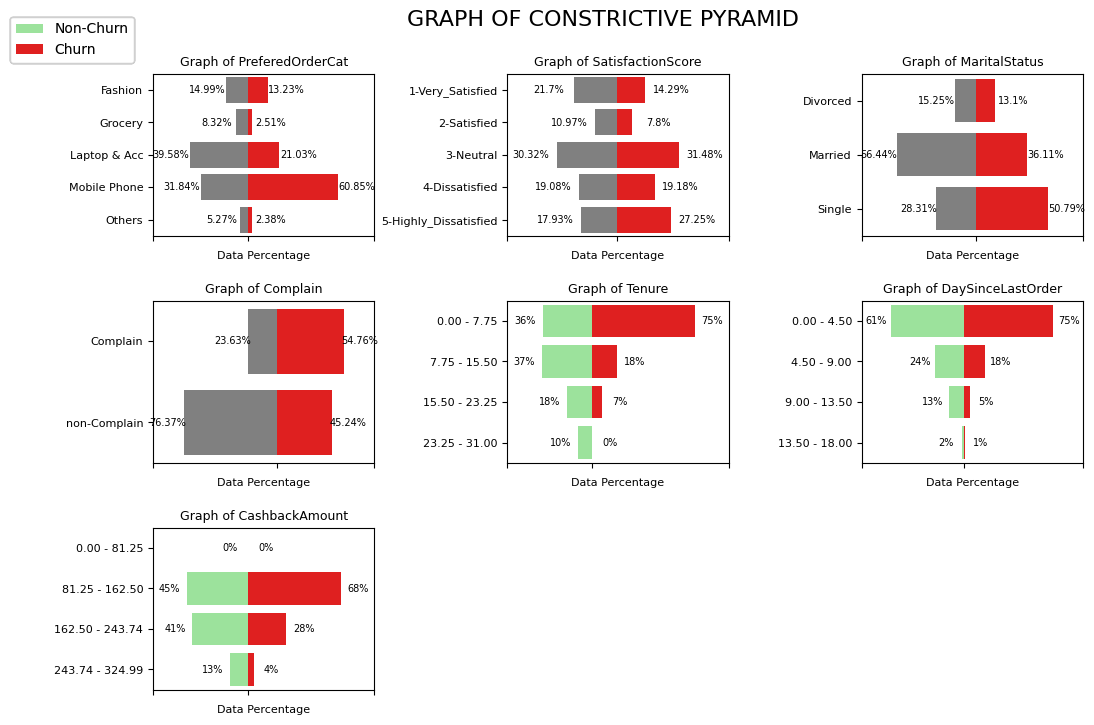

In [14]:
viz_01()

Berdasarkan grafik Constructive Pyramid yang telah disajikan, didapatkan fakta bahwa sekitar 60% pelanggan Churn telah membeli barang dengan kategori Mobile Phone. Besarnya persentase yang telihat dapat mengindikasikan adanya masalah pada barang dengan kategori tersebut, misalnya kualitas yang rendah. Masalah pada kualitas barang tentunya dapat memicu ketidakpuasan dan berdampak pada SatisfactionScore yang rendah. Pada grafik, terlihat bahwa mayoritas pelanggan Churn memberikan penilaian Neutral dan Highly_Dissatisfied. Hal ini dapat dikatakan wajar. Namun, pelanggan yang non-Churn juga ternyata cenderung memberikan penilaian Neutral. Bahkan, score antara Very_Satisfied,  Dissatisfied dan Highly_Dissatisfied hanya berbeda sedikit. Fakta ini menguatkan dugaan bahwa terdapat masalah serius yang sebaiknya diselesaikan agar tidak memberikan dampak yang lebih besar dikemudian hari. Salah satu caranya adalah mengeksplorasi dan menganalisis keluhan-keluhan yang telah disampaikan oleh pelanggan. Selain itu, tim bisnis mungkin perlu melakukan brain storming dan evaluasi kinerja untuk memperbaiki performa saat ini.

Selain gambaran produk dan SatisfactionScore, informasi terkait demografi pelanggan juga ditampilkan pada grafik. Terdapat sekitar 50% pelanggan Churn adalah Single. Proporsi tersebut berbeda dengan pelanggan non-Churn. Mereka yang single atau belum menikah diasumsikan sebagai kelompok usia mudah. Sebuah wawasan umum bahwa kelompok usia muda memiliki daya kritis yang tinggi, termasuk soal preferensi pembelian barang. Mereka cenderung akan mengeksplorasi sebelum membeli dan menentukan standar yang tidak sedikit. Jika mereka menerima barang tidak sesuai ekspektasi atau mendapatkan pelayanan yang kurang baik dari Customer Service, penilaian buruk pada SatisfactionScore akan menjadi akhir yang tidak menyenangkan bagi perusahaan ecommerce tersebut. Dan biasanya, penilaian ini disertai dengan ulasan atau Complain. Hal ini dapat dilihat pada grafik yang menampilkan tingginya persentase Complain dari pelanggan Churn.

Pengalaman kurang baik yang dialami pelanggan, terutama jika tidak kunjung mendapatkan feedback positif dari Customer Service mendorong mereka untuk Churn sesaat setelah berbelanja. Hal tersebut tergambarkan dalam grafik yang memperlihatkan tingkat Churn yang sangat tinggi sebesar 71% terjadi pada interval Tenure 0 hingga 3 hari. Hal tersebut juga seiring dengan informasi yang ditampilkan pada grafik DaySinceLastOrder.

Selanjutnya merujuk pada CashbackAmount, sekitar 72% pelanggan non-Churn mendapatkan Cashback terendah pada interval $97-$195, dan 28% lainnya mendapatkan Cashback lebih tinggi dari interval tersebut. Sedangkan, interval cashback yang sama juga diberikan kepada 84% pelanggan Churn dan hanya sekitar 16% yang mendapatkan Cashback lebih besar. Dengan kata lain, pelanggan Churn mungkin memiliki kecenderungan mendapatkan Cashback yang lebih rendah, namun hal ini dirasa tidak menjadi alasan utama mereka untuk Churn. Dengan demikian dapat disimpulkan bahwa **barang dengan kategori Mobile Phone dapat memicu tingginya angka ketidakpuasan pelanggan yang sebagian besar belum menikah (*Single*), dan pengalaman buruk tersebut berdampak pada keputusan untuk Churn setidaknya 3 hari setelah penggunaan layanan**. 


**Getting Insight 2: PreferedOrderCat, SatisfactionScore and Complain Relation**

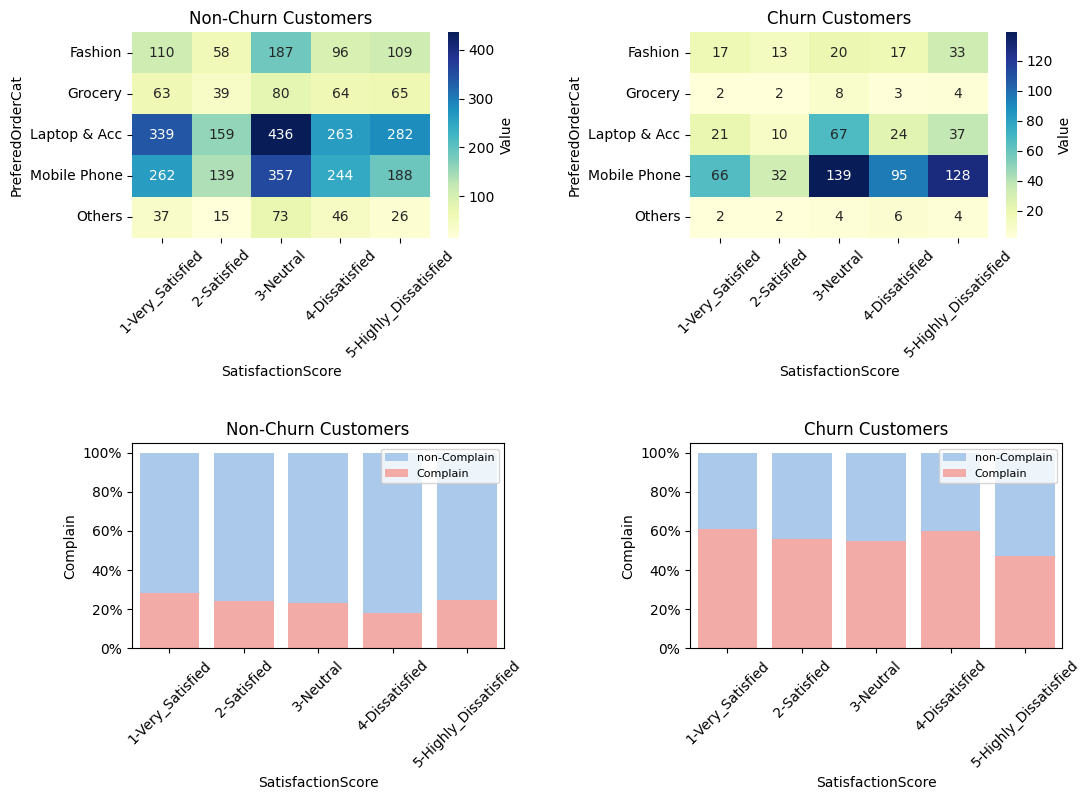

In [15]:
viz_02()

In [16]:
# Category Rate based on SatisfactionScore
data_category = df.groupby(['PreferedOrderCat', 'SatisfactionScore'])[['CityTier']].count()
pivot = pd.pivot_table(data_category, values='CityTier', index='PreferedOrderCat', columns='SatisfactionScore')
score = pivot.copy()
score['1-Very_Satisfied'] = score['1-Very_Satisfied']*5
score['2-Satisfied'] = score['2-Satisfied']*4
score['3-Neutral'] = score['3-Neutral']*3
score['4-Dissatisfied'] = score['4-Dissatisfied']*2
score['5-Highly_Dissatisfied'] = score['5-Highly_Dissatisfied']*1
final_score = round(score.T.sum() / pivot.T.sum(),2)
print('\nCategori Rate based on SatisfactionScore:\n')
print(final_score)


Categori Rate based on SatisfactionScore:

PreferedOrderCat
Fashion         2.89
Grocery         2.90
Laptop & Acc    2.98
Mobile Phone    2.91
Others          2.92
dtype: float64


PreferedOrderCat, SatisfactionScore dan Complain merupakan feature yang ikut menentukan karakteristik pelanggan Churn. Pada subbab ini, ketiga feature tersebut dieksplorasi lebih jauh, terutama terkait relasi antarfitur.  Pola hubungan ketiganya akan dikomparasi ke dalam pelanggan Churn dan non-Churn.

Telah diketahui bahwa Laptop&Accessory dan Mobile Phone merupakan kategori terlaris. Di sisi lain, baik pada pelanggan Churn maupun non-Churn memiliki persamaan, yakni kecenderungan penilaian pada Neutral. Artinya, kepuasan berbelanja dapat dikatakan tidak baik, namun juga tidak buruk. Performa bisnis yang baik adalah mereka yang dapat melayani pelanggannya hingga merasa puas dan sangat puas. Dengan demikian, performa ecommerce yang dikelola perusahaan ini sejatinya mengalami masalah utama pada aspek kepuasan pelanggan.

Merujuk pada grafik, baik pada  grafik heatmap pelanggan Churn dan non-Churn, menunjukkan skor Satisfied memiliki penilaian terendah. Sedangkan Very_Satisfied, Dissatisfied dan Highly_Dissatisfied memiliki proporsi yang tidak jauh berbeda untuk semua kategori barang. Tim bisnis perlu berusaha keras membenahi layanan ecommerce-nya dan berusaha menambah poin lebih banyak untuk skor Very_Satisfied dan Satisfied, sehingga angka retensi pelanggan juga dapat meningkat seiring waktu. 

Pertanyaannya adalah pelayanan seperti apa yang dapat merubah SatisfactionScore menjadi lebih baik?  Jawaban dapat merujuk pada salah satu dari 5 alasan pelanggan Churn yang telah disampaikan, yakni keterlibatan pelanggan dalam strategi bisnis.  Pada grafik StackedBar terlihat ada sekitar 20% pelanggan non-Churn yang memberikan Complain atau dapat dikatakan sebagai review, dan terdapat sekitar 60% pelanggan Churn yang menyampaikan Complain. Complain ini sangat berharga untuk dicerna, dipahami dan dielaborasikan ke dalam strategi-strategi bisnis yang hendak dijalankan. Kemudian, hasilnya harus terus dimonitoring hingga menunjukkan perbaikan performa yang signifikan.


**Getting Insight 3: Tenure and CashbackAmount Relation**

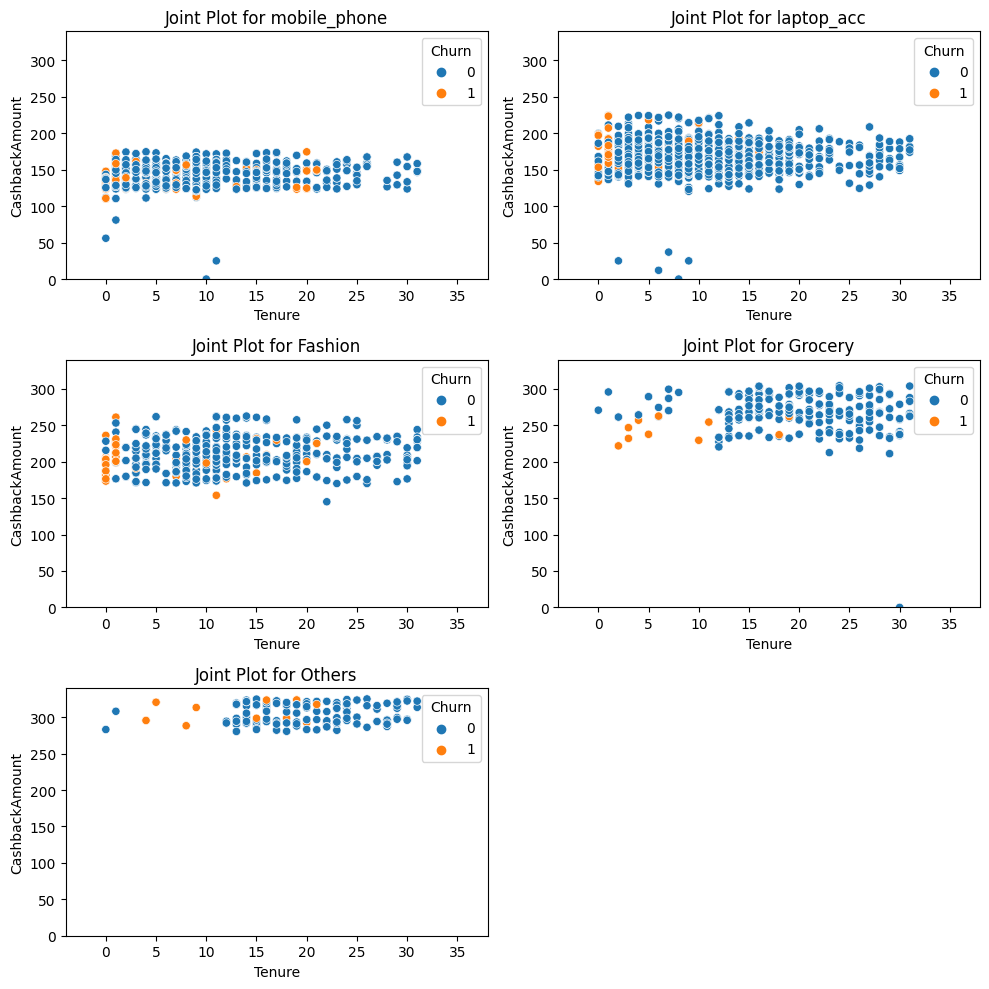

In [17]:
viz_03()

In [18]:
print('Correlation Value Between Tenure and CashbackAmount:\n')

for col, feature in zip(dataframes,features) :
    corr = col[['Tenure','CashbackAmount']].corr(method='spearman')
    print(f'Correlation Value of {feature}: {round(corr.iloc[0][1],2)}')

Correlation Value Between Tenure and CashbackAmount:

Correlation Value of mobile_phone: 0.03
Correlation Value of laptop_acc: nan
Correlation Value of Fashion: 0.16
Correlation Value of Grocery: 0.05
Correlation Value of Others: 0.11


In [19]:
cashback_onCat = df.groupby('PreferedOrderCat').agg({'CashbackAmount':['min', 'max', 'median', 'mean']})
cashback_onCat.columns = ['min_cashback', 'max_cashback', 'median_cashback', 'mean_cashback']
cashback_onCat

,min_cashback,max_cashback,median_cashback,mean_cashback
PreferedOrderCat,,,,
Fashion,145.00,262.57,208.54,210.439000
Grocery,0.00,304.24,267.99,266.775848
Laptop & Acc,0.00,224.98,167.19,167.116404
Mobile Phone,0.00,174.68,142.30,140.162479
Others,280.41,324.99,305.41,304.544000


Fakta pertama yang dapat diungkap dari *Getting Insight 3* adalah hampir tidak ada hubungan antara feature Tenure dan CashbackAmount didasarkan pada uji korelasi yang telah dilakukan. Perusahaan memberikan CashbackAmount melalui skema interval berdasarkan kategori produk, dan tidak bergantung kepada Tenure. Baik pelanggan yang baru, maupun pelanggan lama mendapatkan kesempatan yang sama memperoleh Cashback pada interval minimal hingga maksimal. Dengan kata lain, CashbackAmount diberikan secara acak tanpa memperhatikan Tenure, namun tetap terikat pada kategori produk.

Sayangnya, terdapat tanda tanya besar yang sebaiknya dijawab oleh tim bisnis, *"Kenapa kategori Fashion bisa mendapatkan interval CashbackAmount yang jauh lebih besar dibandingkan kategori Laptop&Accessory dan Mobile Phone?"*, *"Produk Fashion seperti apa dan harga berapa yang disupport dengan besaran CashbackAmount tersebut?"*. Akhirnya, tim bisnis perlu untuk memperbaiki skema CashbackAmount yang lebih realistis didasarkan pada nilai penjualan dan lamanya Tenure pelanggan untuk mendorong penjualan yang lebih baik.

Grafik Scatterplot di atas juga memberikan gambaran terkait Churn sebagai berikut.
1. Pada kategori "Mobile Phone", Churn terjadi pada Tenure 0 dan 1, Tenure lebih dari 5 namun mendapatkan Cashback terendah, dan Tenure 20 dengan Cashback yang bervariasi. Tim bisnis perlu mengevaluasi kembali strategi CashbackAmount yang diberikan mengingat kategori ini merupakan yang paling banyak mengalami Churn. CashbackAmount dapat diberikan berdasarkan harga barang, ditambah dengan penawaran menarik lainnya seperti bundling dengan barang komplementer seperti TWS atau hadiah menarik (*Free Gift*) untuk memperbaiki kualitas penilaian kategori ini.
2. Pada kategori Laptop and Accessory terdapat sedikit pelanggan Churn. Artinya, kategori ini dapat terus dikembangkan dan bisa menjadi kategori utama ecommerce ini. Namun, Churn terjadi pada Tenure 0 dan 1 meskipun diberikan Cashback maksimal. Hal tersebut mungkin disebabkan oleh kualitas barang atau kualitas pelayanan ecommerce. Tim bisnis perlu mengonfirmasinya melalui keluhan yang disampaikan pelanggan untuk terus meningkatkan performa kategori ini.
3. Pada kategori Fashion, Churn umumnya terjadi pada Tenure 0 dan 1. Churn juga terjadi pada Tenure yang lebih tinggi dengan besaran Cashback yang bervariasi. Catatan untuk kategori Fashion adalah evaluasi Cashback terhadap harga produk.
4. Pada kategori Grocery, Churn terjadi pada Tenure rendah dengan Cashback yang kecil. Sedangkan pada Tenure yang lebih besar, Churn sangat jarang terjadi meskipun Cashback diberikan dengan besaran yang bervariasi.  Berdasarkan gambaran tersebut dikatakan bahwa mungkin telah terdapat kelompok pelanggan yang memiliki loyalitas tinggi mengingat Grocery merupakan jenis bisnis FMCG sehingga order bisa bersifat repetisi. Berdasarkan informasi ini, tim bisnis perlu membangun relasi yang kuat dengan kelompok pelanggan ini untuk menciptakan iklim berbelanja yang positif.
5. Pada kategori Others, pelanggan diberikan Cashback paling besar dibandingkan kategori lainnya. Pola sebaran pelanggan berdasarkan Tenure dan Cashback juga terlihat mirip dengan kategori Grocery. Sayangnya, analisis yang lebih mendalam mungkin dapat dilakukan jika daftar barang yang termasuk kategori ini diketahui.

**Business Recommendation:**

1. Kedepannya, mungkin perlu ditambahkan kolom amount dan total order yang telah dikeluarkan customer sebelum churn untuk mengevaluasi faktor-faktor penyebab churn yang lainnya.
2. Promosi dalam hal ini sebenarnya tidak hanya berupa cashback saja, melainkan free gift tertentu berdasarkan kategori barang yang dibeli pelanggan. Cashback sendiri dapat berupa limitasi amount, maupun besaran persentase. Penggunaan bahasa marketing yang baik dapat menarik minat pelanggan untuk menjadi loyal terhadap layanan ecommerce.
3. Berikan layanan terbaik kepada customer sehingga mereka loyal untuk selalu berbelanja dan meminimalisir komplen. layanan di sini berupa responsif, keramahan penjual, pengiriman cepat, dan lain sebagainya.